<h1 style="font-size:2rem;color:Blue;"> <center>Quizz Game using vocal command<br> By training a model</center>


In [1]:
import librosa
import numpy as np
import os
import IPython.display as ipd

### Collect data using microphone

In [48]:
import speech_recognition as sr
i = 1
while(i<10):
    # Initialize recognizer class
    recognizer = sr.Recognizer()

    # Record audio
    with sr.Microphone() as source:
        print("Say something!")
        recognizer.adjust_for_ambient_noise(source , duration=1.5)
        audio = recognizer.listen(source, phrase_time_limit=2)

    # Save the audio file
    filename = f"recorded_audio+_{i}.wav"
    with open(filename, "wb") as f:
        f.write(audio.get_wav_data())
    i+=1

    # Read the saved audio file
    with sr.AudioFile(filename) as source:
        audio = recognizer.record(source)
        text = recognizer.recognize_google(audio, language='fr-FR')
        print(text)

Say something!
result2:
{   'alternative': [   {'confidence': 0.9271031, 'transcript': 'le 4'},
                       {'transcript': 'le quatre'}],
    'final': True}
le 4
Say something!
result2:
{   'alternative': [   {'confidence': 0.82146418, 'transcript': 'mets 4'},
                       {'transcript': 'mets quatre'},
                       {'transcript': 'les quatre'},
                       {'transcript': '4'}],
    'final': True}
mets 4
Say something!
result2:
{   'alternative': [   {'confidence': 0.9271031, 'transcript': 'le 4'},
                       {'transcript': 'le quatre'},
                       {'transcript': 'Leucate'}],
    'final': True}
le 4
Say something!
result2:
{   'alternative': [   {'confidence': 0.9271031, 'transcript': 'le 4'},
                       {'transcript': 'le quatre'}],
    'final': True}
le 4
Say something!
result2:
{   'alternative': [   {'confidence': 0.89325988, 'transcript': 'le 4'},
                       {'transcript': 'le'},
            

### Load data and extarct features

In [190]:
# Define a list to store the labels
labels = []
mfcc_features = []

# Iterate over all subfolders in the "data" folder
for subfolder in os.listdir("new_data"):
    subfolder_path = os.path.join("new_data", subfolder)
    # Iterate over all audio files in the current subfolder
    for file in os.listdir(subfolder_path):
        # Load audio file
        y, sr = librosa.load(os.path.join(subfolder_path, file))
        
        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr,)
        # Flatten the 2D MFCC array into a 1D array
        mfcc_flat = mfcc.flatten()
        
        # mean of mfcc
        mean_mfcc = mfcc_flat.mean()
        # standard deviation of mfcc
        std_mfcc = mfcc_flat.std()
        # feature in function of the mean and the std
        feature = (mean_mfcc+std_mfcc)/mean_mfcc
       
        # Append the features to the list
        mfcc_features.append(feature)
        # Append the label to the list
        labels.append(subfolder)
        

In [102]:
# All the classes in my dataset
print(list(set(labels)))

['un', 'trois', 'deux', 'quatre']


In [192]:
from sklearn.model_selection import train_test_split
# Split the dataset into a 70/30 training/test split
X_train, X_test, y_train, y_test = train_test_split(mfcc_features, labels, test_size=0.2, random_state=42)

In [193]:
from sklearn.preprocessing import LabelEncoder

# transform labels from strings to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
print(y_train.shape)

# transform data from lists to np arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(X_train.shape)

for i in range(len(y_test)):
    print(X_train[i], y_train[i])

(63,)
(63, 1)
[-3.4072313] 3
[-3.44603] 3
[-3.7611423] 2
[-3.730568] 2
[-3.5865252] 0
[-3.417984] 3
[-3.773037] 0
[-3.5607967] 2
[-3.5518339] 1
[-3.7657106] 3
[-3.0225267] 2
[-3.6217444] 2
[-3.5077088] 0
[-3.4592357] 1
[-3.4748716] 2
[-3.4272432] 3


### Training using SVM model

In [194]:
from sklearn.svm import SVC
clf = SVC()
H=clf.fit(X_train, y_train)

##### Make predictions on the training data

In [195]:
y_pred = clf.predict(X_train)
print(f'y_test : {y_train}')
print(f'y_pred : {y_pred}')
# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred)
print(f'accuracy : {round(train_accuracy*100,2)}%')

y_test : [3 3 2 2 0 3 0 2 1 3 2 2 0 1 2 3 0 2 2 0 3 1 2 0 3 0 0 1 0 3 0 1 3 2 2 3 0
 1 2 1 2 1 2 3 2 0 1 3 2 3 3 1 1 0 2 1 0 1 1 3 3 0 2]
y_pred : [3 3 0 0 2 3 0 3 3 0 1 0 3 3 3 3 0 0 0 2 3 1 1 0 3 0 0 1 0 3 0 1 3 3 3 3 0
 3 0 1 3 1 3 3 3 0 1 0 3 3 3 1 1 0 2 1 0 1 1 2 3 0 1]
accuracy : 58.73%


##### Make predictions on the test data

In [196]:
y_pred = clf.predict(X_test)
print(f'X_test : {X_test}')
print(f'y_test : {y_test}')
print(f'y_pred : {y_pred}')
# Evaluate the model
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy : {round(test_accuracy*100,2)}%')

X_test : [[-3.1411333]
 [-3.5704477]
 [-3.4817605]
 [-3.4097688]
 [-3.7790918]
 [-3.3809555]
 [-3.6191459]
 [-3.6570845]
 [-3.5910525]
 [-3.6548815]
 [-3.610173 ]
 [-3.3682635]
 [-3.5009096]
 [-3.5161812]
 [-3.3985226]
 [-3.5904627]]
y_test : [1 0 1 1 0 1 0 3 0 0 2 1 3 1 3 2]
y_pred : [1 2 3 3 0 3 0 0 2 0 2 1 3 3 3 2]
accuracy : 56.25%


**==>** une prediction et une justesse moyenne !

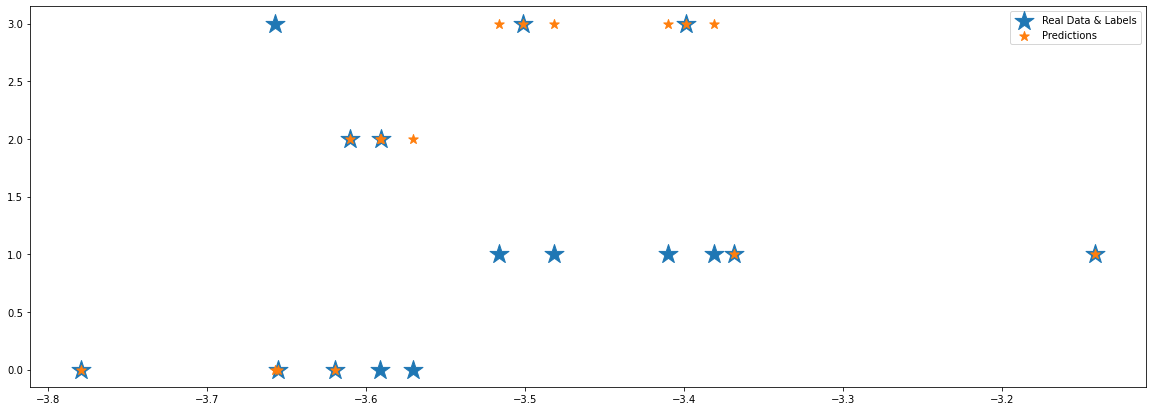

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.scatter(X_test, y_test, s=400, label="Real Data & Labels", marker='*')
plt.scatter(X_test, y_pred,s=100, label="Predictions", marker='*')
plt.legend()
plt.show()


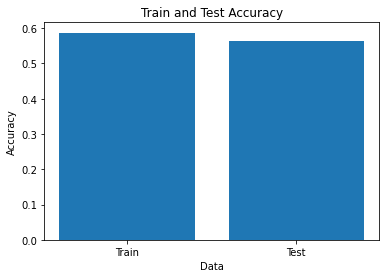

In [169]:
accuracies = [train_accuracy, test_accuracy]
data = ["Train", "Test"]

plt.bar(data, accuracies)
plt.xlabel("Data")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy")
plt.show()